<a href="https://colab.research.google.com/github/LizzyZhang-tutu/NLP_Learning/blob/master/TextToFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Converting text to features

In [4]:
Text = "I am learning NLP"
import pandas as pd

#convert text to features
pd.get_dummies(Text.split())

,I,NLP,am,learning
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0


Count Vectorizer

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
text = ["kiwi is my pet cat and I love kiwi so much"]

In [18]:
vectorizer = CountVectorizer()

In [19]:
vectorizer.fit(text)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [20]:
vector = vectorizer.transform(text)

In [21]:
print(vectorizer.vocabulary_)
print(vector.toarray())

{'kiwi': 3, 'is': 2, 'my': 6, 'pet': 7, 'cat': 1, 'and': 0, 'love': 4, 'so': 8, 'much': 5}
[[1 1 1 2 1 1 1 1 1]]


N-grams

In [ ]:
Text = "I am learning NLP"

In [23]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
#Unigram
TextBlob(Text).ngrams(1)

[WordList(['I']), WordList(['am']), WordList(['learning']), WordList(['NLP'])]

In [29]:
#Bigram
TextBlob(Text).ngrams(2)

[WordList(['I', 'am']),
 WordList(['am', 'learning']),
 WordList(['learning', 'NLP'])]

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
#Note that stopword filtering is applied before n-gram extraction
text = ["kiwi is my pet cat and I love kiwi so much"]
vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2))
vectorizer.fit(text)
vector = vectorizer.transform(text)
print(vectorizer.vocabulary_)
print(vector.toarray())

{'kiwi is': 3, 'is my': 2, 'my pet': 6, 'pet cat': 7, 'cat and': 1, 'and love': 0, 'love kiwi': 5, 'kiwi so': 4, 'so much': 8}
[[1 1 1 1 1 1 1 1 1]]


Hash Vectorizing

In [43]:
from sklearn.feature_extraction.text import HashingVectorizer

text = ["I love kiwi. kiwi is my pet cat"]

vectorizer = HashingVectorizer(n_features=100)

vector = vectorizer.transform(text)

print(vector.shape)
print(vector.toarray())


(1, 100)
[[ 0.         -0.33333333  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.         -0.66666667  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.33333333
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.33333333
   0.          0.          0.          0.          0.          0.
   0.          0.         -0.33333333  0.          

Word Embedding

Skipgram

In [47]:
sentences = [['I', 'love', 'nlp'],
             ['I', 'will', 'learn', 'nlp', 'in', '2', 'months'],
             ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
             ['nlp', 'uses', 'machine', 'learning']]

import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# this model gives a vector of size 50 for each word.
skipgram = Word2Vec(sentences, size = 50, window = 3, min_count = 1, sg = 1)
print(skipgram)

print(skipgram['nlp'])
print(skipgram['love'])

Word2Vec(vocab=19, size=50, alpha=0.025)
[-4.0821270e-03  2.2045025e-04  5.0217770e-03  8.2051789e-05
 -1.2907932e-03 -3.3861955e-03  1.7062204e-03  7.3950016e-03
 -1.2766084e-03  7.5666835e-03 -3.9432300e-03  3.9942083e-03
  2.7674234e-03 -9.9897617e-04 -6.3266982e-03 -6.4120023e-03
  9.2570379e-05 -1.1570011e-03  7.6748473e-03  8.6819538e-04
 -8.1573392e-04  1.2838913e-03  4.5836354e-03 -5.0570131e-03
  8.8247200e-03 -2.5034966e-03  8.2227746e-03 -9.2226360e-03
 -8.5668406e-03  6.1477968e-03 -4.5651221e-04  4.1345749e-03
  2.4011689e-03  3.5019701e-03 -9.5017152e-03  7.4590747e-03
  2.8604616e-03  5.5680779e-04 -7.3125968e-03 -5.1438008e-03
 -9.3714138e-03  2.9805521e-03 -6.3796402e-03 -1.7432587e-05
  2.9476946e-03  1.2321135e-03 -7.4861497e-03 -5.9460849e-03
 -2.6450770e-03  3.8206759e-03]
[ 0.0045935   0.00773943  0.00125944 -0.00593603  0.00673969  0.00405087
 -0.00021243 -0.00838646  0.0027483   0.00527214  0.00729943 -0.00039761
  0.00164006 -0.00867255  0.00089591 -0.00948612 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


In [48]:
skipgram.save('skipgram.bin')
skipgram = Word2Vec.load('skipgram.bin')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


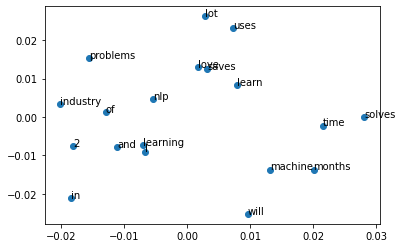

In [51]:
X = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

#create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)
for i, word in enumerate(words):
  pyplot.annotate(word, xy = (result[i, 0], result[i, 1]))

pyplot.show()


Continuous Bag of Words

Word2Vec(vocab=19, size=50, alpha=0.025)
[-4.0821270e-03  2.2045025e-04  5.0217770e-03  8.2051789e-05
 -1.2907932e-03 -3.3861955e-03  1.7062204e-03  7.3950016e-03
 -1.2766084e-03  7.5666835e-03 -3.9432300e-03  3.9942083e-03
  2.7674234e-03 -9.9897617e-04 -6.3266982e-03 -6.4120023e-03
  9.2570379e-05 -1.1570011e-03  7.6748473e-03  8.6819538e-04
 -8.1573392e-04  1.2838913e-03  4.5836354e-03 -5.0570131e-03
  8.8247200e-03 -2.5034966e-03  8.2227746e-03 -9.2226360e-03
 -8.5668406e-03  6.1477968e-03 -4.5651221e-04  4.1345749e-03
  2.4011689e-03  3.5019701e-03 -9.5017152e-03  7.4590747e-03
  2.8604616e-03  5.5680779e-04 -7.3125968e-03 -5.1438008e-03
 -9.3714138e-03  2.9805521e-03 -6.3796402e-03 -1.7432587e-05
  2.9476946e-03  1.2321135e-03 -7.4861497e-03 -5.9460849e-03
 -2.6450770e-03  3.8206759e-03]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


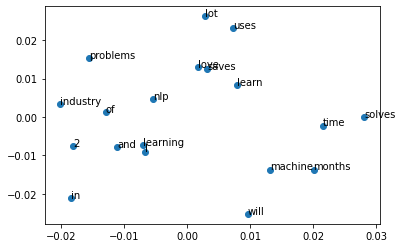

In [52]:
sentences = [['I', 'love', 'nlp'],
             ['I', 'will', 'learn', 'nlp', 'in', '2', 'months'],
             ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
             ['nlp', 'uses', 'machine', 'learning']]

import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

cbow = Word2Vec(sentences, size = 50, window = 3, min_count = 1, sg = 1)
print(cbow)
print(cbow['nlp'])
cbow.save('cbow.bin')
cbow = Word2Vec.load('cbow.bin')

X = cbow[cbow.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(cbow.wv.vocab)

for i, word in enumerate(words):
  pyplot.annotate(word, xy = (result[i, 0], result[i, 1]))

pyplot.show()

In [54]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"


--2020-08-05 05:07:45--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.17.254
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.17.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  63.3MB/s    in 26s     

2020-08-05 05:08:11 (61.6 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [56]:
import gensim

model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

print(model.similarity('this', 'is'))
print(model.similarity('post', 'book'))

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


0.40797037
0.057204384


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [59]:
model.most_similar(positive=['woman', 'king'], negative=['man'])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]